<a href="https://colab.research.google.com/github/ainunharr/pythontask/blob/main/tugas14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def cos(frek,tipe,tt,tp,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #tt = tinggi tower (meter)
  #tp = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    atp = (1.1*np.log10(frek)-0.7)*tp-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(tt))-atp+((44.9-6.55*np.log10(tt))*np.log10(d))-Cm
    
    return Lp

def PReceiver(Ptx, Lp, Gtx, Grx):
  Prx = Ptx-Lp+Gtx+Grx
  return Prx

def SNR (Prx, Bandwidth):
  no=-174+(10*np.log10(Bandwidth))
  no=10**(no/10)
  SNR= Prx/no
  return SNR

def Capacity (SNR, Bandwidth):
  c=Bandwidth*np.log2(1+SNR)
  return c

In [46]:
#Model Frekuensi 1800
f=1800
fa=900
fb=700
loca="urban"
locb="suburban"
locc= "open"
tower=80
user=1.5
dmin=300
dmax=1000
N=200
Ptx=30
Ptx=Ptx*1000
Ptx=10*np.log10(Ptx)
Gtx=10
Grx=2
Bandwidth= 5000000

#Perhitungang Daya Terima Berdasarkan Frekuensi
d=np.random.randint(dmin,dmax,N)
d=d[np.argsort(d)]
a= cos(f,loca,tower,user,d)
a=a[np.argsort(d)]
g= PReceiver(Ptx,a,Gtx,Grx)
g= 10**(g/10)
b= cos(fa,loca,tower,user,d)
b=b[np.argsort(d)]
h= PReceiver(Ptx,b,Gtx,Grx)
h= 10**(h/10)
c= cos(fb,loca,tower,user,d)
c=c[np.argsort(d)]
i= PReceiver(Ptx,c,Gtx,Grx)
i= 10**(i/10)



#Perhitungan Daya Terima Berdasarkan Lokasi
a1= cos(f,loca,tt,tp,d)
a1=a1[np.argsort(d)]
j= PReceiver(Ptx,a1,Gtx,Grx)
j= 10**(j/10)
b1= cos(f,locb,tt,tp,d)
b1=b1[np.argsort(d)]
k= PReceiver(Ptx,b1,Gtx,Grx)
k= 10**(k/10)
c1= cos(f,locc,tt,tp,d)
c1=c1[np.argsort(d)]
l= PReceiver(Ptx,c1,Gtx,Grx)
l= 10**(l/10)

#Perhitungan SNR Berdasarkan Frekuensi
SNR1= SNR(g,Bandwidth)
SNR2= SNR(h,Bandwidth)
SNR3= SNR(i,Bandwidth)

#Perhitungan SNR Berdasarkan Lokasi
SNR4= SNR(j,Bandwidth)
SNR5= SNR(k,Bandwidth)
SNR6= SNR(l,Bandwidth)

#Perhitungan Capacity Berdasarkan Frekuensi
ca1 = Capacity(SNR1,Bandwidth)
ca2 = Capacity(SNR2,Bandwidth)
ca3 = Capacity(SNR3,Bandwidth)

#Perhitungan Capacity Berdasarkan Lokasi
ca4 = Capacity(SNR4,Bandwidth)
ca5 = Capacity(SNR5,Bandwidth)
ca6 = Capacity(SNR6,Bandwidth)

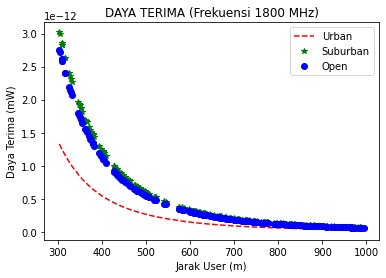

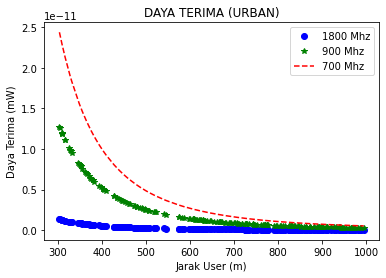

In [47]:
plt.figure("Frekuensi")
plt.title("DAYA TERIMA (Frekuensi 1800 MHz)")
plt.plot(d,j,'r--',label="Urban")
plt.plot(d,k,'g*',label="Suburban")
plt.plot(d,l,'bo',label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Daya Terima (mW)")

plt.figure("Mode Urban")
plt.title("DAYA TERIMA (URBAN)")
plt.plot(d,g,'bo',label="1800 Mhz")
plt.plot(d,h,'g*',label="900 Mhz")
plt.plot(d,i,'r--',label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Daya Terima (mW)")
plt.show()


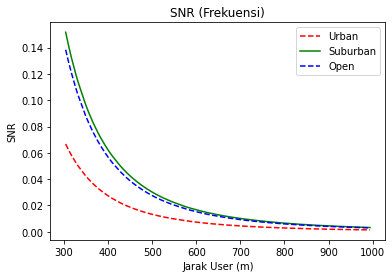

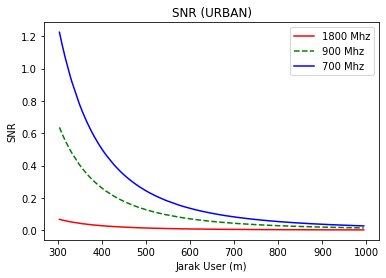

In [48]:
plt.figure("SNR Frekuensi")
plt.title("SNR (Frekuensi)")
plt.plot(d,SNR4,'r--',label="Urban")
plt.plot(d,SNR5,'g',label="Suburban")
plt.plot(d,SNR6,'b--',label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("SNR")

plt.figure("SNR Urban")
plt.title("SNR (URBAN)")
plt.plot(d,SNR1,'r',label="1800 Mhz")
plt.plot(d,SNR2,'g--',label="900 Mhz")
plt.plot(d,SNR3,'b',label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("SNR")
plt.show()

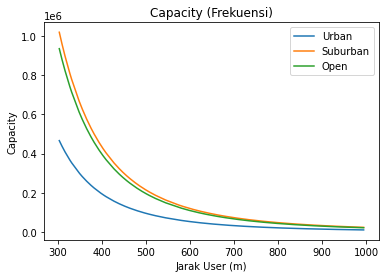

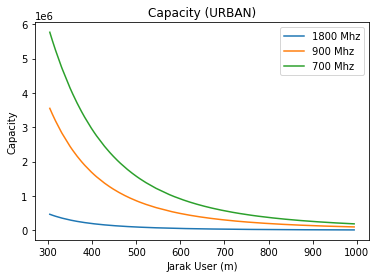

In [49]:
plt.figure("Capacity Frekuensi")
plt.title("Capacity (Frekuensi)")
plt.plot(d,ca4,label="Urban")
plt.plot(d,ca5,label="Suburban")
plt.plot(d,ca6,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Capacity")

plt.figure("Capacity Urban")
plt.title("Capacity (URBAN)")
plt.plot(d,ca1,label="1800 Mhz")
plt.plot(d,ca2,label="900 Mhz")
plt.plot(d,ca3,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Capacity")
plt.show()